# Mathematik für Biologiestudierende

Wintersemester 2025/26

29. Oktober 2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)


## Themen heute

* Streuungsparameter
* Quartile
* Box-Whisker Plots
* Modelle in der Wahrscheinlichkeitstheorie

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd

# Streuungsparameter

## Empirische Varianz und Stichprobenstreuung

* Beim Stichprobenumfang $n$ seien $x_1, x_2, x_3, \dots, x_n$ die Messwerte, dann ist das *empirische Varianz* gleich
    \begin{equation*}
      s^2 = \frac{(x_1-\overline x)^2 + (x_2-\overline x)^2 +
        (x_3-\overline x)^2 + \dots + (x_n-\overline x)^2}{n-1}
    \end{equation*}
    Dabei ist $\overline x$ das arithmetische Mittel
* Die empirische Varianz wird mit $s^2$ bezeichnet.  

* Die Zahl $s$ heißt *empirische Standardabweichung* oder
    *Stichprobenstreuung*
* Die Stichprobenstreuung ist also die Quadratwurzel der empirischen Varianz

## Konkrete Rechnung

Bei fünf Proben wurden die folgenden Massen in [g] gewogen: 

| Nummer | 1      | 2      | 3     | 4      | 5   |
|--------|--------|--------|-------|--------|-----|
| Masse  | 1.1    | 1.3    | 1.6   | 1.3    | 2.0 |

$$\displaystyle \sum_{j=1}^5 x_j = 7.3g$$
$$\overline x = \frac{7.3g}5 = 1.46g$$
$$\sum_{j=1}^5 (x_j-\overline x)^2 = 0.4920g^2$$
$$s^2 = \frac{0.4920g^2}4 = 0.1230g^2 \quad\text{und}\quad
s = \sqrt{0.1230g^2} = 0.3507g$$

In [2]:
maeuse = pd.DataFrame()
maeuse['Gewicht'] = [21.3, 19.8, 20.4, 19.0, 22.7]
maeuse

,Gewicht
0,21.3
1,19.8
2,20.4
3,19.0
4,22.7


In [3]:
maeuse.var()

Gewicht    2.033
dtype: float64

`var` empirische Varianz

In [4]:
maeuse.std()

Gewicht    1.425833
dtype: float64

`std`  Stichprobenstreuung (engl.  "sample standard deviation")

## Stichprobenstreuung vs. Varianz

* Der Vorteil der Stichprobenstreuung gegenüber der Varianz ist, dass die Stichprobenstreuung richtig skaliert
* Das bedeutet folgendes: Wenn ich alle Daten mit 1000 multipliziere, dann
  * multipliziert sich das arithmetische Mittel mit 1000
  * multipliziert sich die Varianz mit 1000000
  * multipliziert sich die Stichprobenstreuung mit 1000
* Das bedeutet auch, dass die Stichprobenstreuung in derselben Einheit angegegeben wird wie die Daten





## Formeln für die Varianz

* Die Definition ohne Pünktchen
    \begin{equation*}
      s^2 = \frac1{n-1} \sum_{j=1}^n \left(x_j - \overline x \right)^2
    \end{equation*}
* Eine etwas einfachere Formel, deren Richtigkeit leicht nachgerechnet werden kann
    \begin{equation*}
      s^2 = \frac1{n-1} \biggr( \Bigr( \sum_{j=1}^n x_j^2 \Bigr) - n
      {\overline x}^2 \biggr)
    \end{equation*}

## Warum $n - 1$ im Nenner?

* $n-1$ ist die Zahl *Freiheitsgrade*
* Das ist ein heuristisches Konzept:
  * erstmal hat man pro Stichprobe einen Freiheitsgrad
  * für jeden Wert, den man hilfsweise schätzen muss, wird ein Freiheitsgrad abgezogen
* zur Berechnung der Varianz muss das arithmetische Mittel bestimmt werden:  also ein Freiheitgrad Abzug

* Das bedeutet, dass man, wenn man für viele Datensätze die Varianz mit dieser Methode feststellt, im Mittel näher an der wahren Varianz ist, als wenn man den Nenner $n$ benutzt
* Alle großen Software-Pakete machen das so 

Software-Pakete:

* `python` mit `pandas` und `scipy.stats`
* `R`
* `SPSS`

Wenn gewünscht, kann man von Nenner $n-1$ zu Nenner $n$ umschalten

In [5]:
maeuse.var(ddof=0)

Gewicht    1.6264
dtype: float64

In [6]:
maeuse.var()

Gewicht    2.033
dtype: float64

`ddof` = delta degrees of freedom; das ist die Zahl, die man vom Stichprobenumfang abzieht, um die Zahl der Freiheitsgrade zu bekommen

Achten Sie auf Ihren Taschenrechner!

## Zusammenfassungen mit `describe`

In [7]:
maeuse.describe()

,Gewicht
count,5.000000
mean,20.640000
std,1.425833
min,19.000000
25%,19.800000
50%,20.400000
75%,21.300000
max,22.700000


* `count`: Anzahl
* `mean`: arithmetisches Mittel
* `std`: Stichprobenstreuung
* `min`: kleinster Wert
* `50%`: Median
* `25%`, `75%`: Quartile  (s.u.)
* `max`: größter Wert

Funktioniert auch für DataFrames

In [8]:
df = sns.load_dataset("penguins")
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


* Spalten, die kategorielle Daten enthalten, werden ausgelassen
* bei `count` sind die `NaN` nicht mitgezählt

## Quartile

* Das Quartil $Q_1$ ist als derjenige Wert definiert, unter dem 25% und über dem 75% der Messwerte liegen
* Das Quartil $Q_3$ ist als derjenige Wert definiert, über dem 25% und unter dem 75% der Messwerte liegen
* Das Quartil $Q_2$ ist der Median

* Bei den Schnabellängen: $Q_1 = 39.225$ und $Q_3 = 48.5$

#### Beispielgrafik

die vier Viertel sind unterschiedlich gefärbt

![Image](./bilder/quartile.png)

## Zusammenhang zwischen Quartilen und Quantilen

* Allgemeiner ist für $q$ zwischen $0$ und $1$ das $q$-*Quantil* derjenige Wert, so dass der Anteil der Messwerte unterhalb dieses Wertes gleich $q$ und der Anteil oberhalb gleich $1-q$ ist
* Wenn $q$ in Prozent ausgedrückt wird, dann spricht man auch von *Perzentilen*

|Quartil     |Quantil      |
|------------|-------------|
|1. Quartil  | 25%-Quantil |
|Median      | 50%-Quantil |
|3. Quartil  | 75%-Quantil | 

Beispiel

* Leute, die zu den reichsten 1% der Bevölkerung gehören, haben ein Einkommen oberhalb des 99%-Quantils

# Interquartilabstand

* Der Interquartilabstand ist definiert als
  $$
      \text{IQR} = Q_3 - Q_1
  $$
* Der Interquartilabstand ist ein robustes Maß für die Streuung

Berechnung des Interquartilabstands

In [9]:
body = df.body_mass_g.describe()
body

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [10]:
body['75%'] - body['25%']

1200.0

# Box-Whisker-Plots

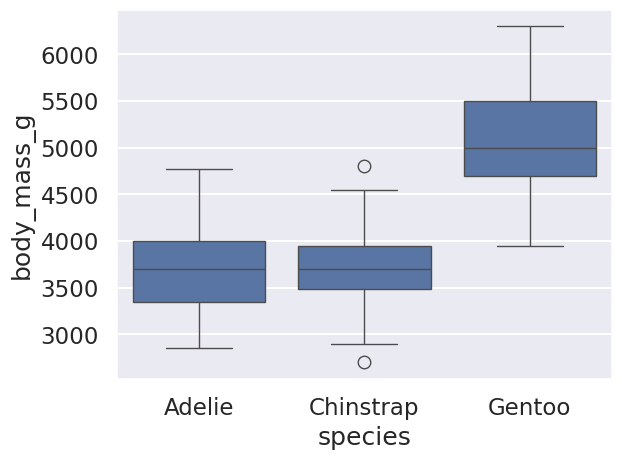

In [11]:
sns.boxplot(df, x="species", y="body_mass_g");

Ein Boxplot, auch Box-Whisker-Plot genannt, zeigt von unten nach oben

* untere Einzelpunkte
* unterster Datenpunkt, der kein Einzelpunkt ist
* $Q_1$
* Median
* $Q_3$
* oberster Datenpunkt, der kein Einzelpunkt ist
* obere Einzelpunkte

Einzelpunkte sind solche, die weiter als 1.5 Interquartilabstände von $Q_1$ bzw. $Q_3$ weg sind

Manchmal werden die Einzelpunkte als "Ausreißer" bezeichnet.   Das kann man aber nicht so einfach gleichsetzen.

In [12]:
maeuse2 = pd.DataFrame()
maeuse2['Gewicht'] = [21.3, 19.8, 20.4, 19.0, 22.7, 287] 

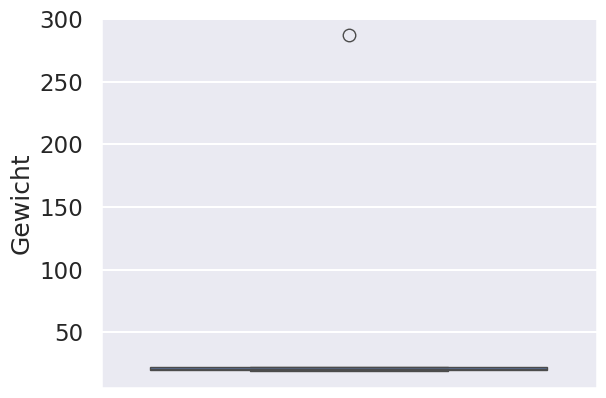

In [13]:
sns.boxplot(maeuse2.Gewicht);

Das ist wirklich ein Ausreißer (engl. "outlier")

# Erläuterungen zu Python und Pandas

## Klammern

### eckige Klammern

für die Auswahl eines Elements aus einer Sammlung:

Einige Beispiele

In [14]:
liste = ['Elephant', 'Rhinozeros', 'Spitzmaus']

In [15]:
liste[0]

'Elephant'

In [16]:
df = sns.load_dataset('penguins')
df['body_mass_g']

0      3750.0
1      3800.0
2      3250.0
3         NaN
4      3450.0
        ...  
339       NaN
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 344, dtype: float64

In [17]:
df.loc[4]

species                 Adelie
island               Torgersen
bill_length_mm            36.7
bill_depth_mm             19.3
flipper_length_mm        193.0
body_mass_g             3450.0
sex                     Female
Name: 4, dtype: object

### Runde Klammern

#### Funktionsausrufe

In [18]:
np.log(2)

0.6931471805599453

In [19]:
df.body_mass_g.median()

4050.0

#### Ausführungsreihenfolge

#### 

In [20]:
2 * 3+4

10

In [21]:
2 * (3+4)

14

### Beispiel aus Lektion 5 mit beiden Sorten Klammern

In [24]:
df[(df.island=='Dream') & (df.sex=='Female') & (df.bill_length_mm <= 36)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
42,Adelie,Dream,36.0,18.5,186.0,3100.0,Female
48,Adelie,Dream,36.0,17.9,190.0,3450.0,Female
90,Adelie,Dream,35.7,18.0,202.0,3550.0,Female
92,Adelie,Dream,34.0,17.1,185.0,3400.0,Female
98,Adelie,Dream,33.1,16.1,178.0,2900.0,Female
136,Adelie,Dream,35.6,17.5,191.0,3175.0,Female
142,Adelie,Dream,32.1,15.5,188.0,3050.0,Female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,Female
150,Adelie,Dream,36.0,17.1,187.0,3700.0,Female


* eckige Klammern:  Auswahl von Zeilen mit den gesuchten Eigenschaften
* runde Klammern:   erzwingen Vorrang des Vergleichsoperators `==` vor dem logischen Operator `&`